# Importing Python libraries

In [1]:
import numpy as np  # library for numeric calculations   
import pandas as pd # library for reading data 
import seaborn as sns # library for plots 
from matplotlib import cm # library fo plots 
import matplotlib.pyplot as plt # library for plots 
from datetime import datetime # library to get the current time 
import datetime # library for time 
from sklearn.metrics import mean_squared_error # library for evaluation  mse 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt  # library for evaluation  rmse
from sklearn.metrics import mean_absolute_error # library for evaluation mae 
from prettytable import PrettyTable # library for for comparison in tables 
from plotly.subplots import make_subplots # library for plots 
import plotly.graph_objs as go # library for plots 
from sklearn.linear_model import LinearRegression # library for linear regression model training 
import xgboost # library for xgboost model training 
from sklearn.ensemble import RandomForestRegressor # library for random forest model training 
from sklearn import linear_model # library for ridge model training 
from sklearn.neural_network import MLPRegressor # library for Mlp model training 
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVR # library for SVR model training 
from sklearn.neighbors import KNeighborsRegressor # library for KNN model training 
from statsmodels.tsa.statespace.sarimax import SARIMAX # library for Sarima model training 
from keras.models import Model # library for for LSTM model 
from keras.layers import LSTM, Activation, Input, Embedding # library for LSTM
from keras.layers import Activation # library for RNN 
from keras.models import Sequential # library for RNN 
from keras.layers import Dense, Conv1D, Flatten, Dropout # library for LSTM
import datetime as dt #library for dates 
from binance import Client #library for getting python binance data
from binance import *
from sklearn.model_selection import RandomizedSearchCV #library for seraching best parametr
from keras.wrappers.scikit_learn import KerasClassifier #library for neural network model
from sklearn.model_selection import GridSearchCV #library for searching best parameter
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer  
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer 
import re 
import string
from collections import Counter 
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer
import tweepy as tw 

from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import spacy
from keras.preprocessing.text import Tokenizer
import matplotlib.cm as cm
from matplotlib import rcParams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings # library to avoid system erros 
warnings.filterwarnings("ignore")  # library to avoid system erros 

C:\Users\callu\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\callu\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# ------------------------------------------------------------------------------------------------------

## Settings

In [2]:
cryptoTicker = "ETH"
cryptoPair = "USDT"

trainTestSplit = 0.8

# ------------------------------------------------------------------------------------------------------

### Loading the twitter data

In [3]:
data=pd.read_csv('Datasets/dataFileETH.csv')

In [4]:
li = data['tweet'].str.lower().str.cat(sep=' ')

# Removing punctuation,numbers and returns list of words

In [5]:
li2 = re.sub('[^A-Za-z]+', ' ', li)

# Removing the stopwords from the text

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')        
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\callu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Getting Tokenization of the text

In [7]:
word_tokens = word_tokenize(li2)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Removing characters which have length less than 2  

In [8]:
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Removing numbers

In [9]:
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

# Frequency distribution of aspect words 

In [10]:
word_dist = nltk.FreqDist(cleaned_data_title)
top100_words = pd.DataFrame(word_dist.most_common(100),
                    columns=['Word', 'Frequency'])

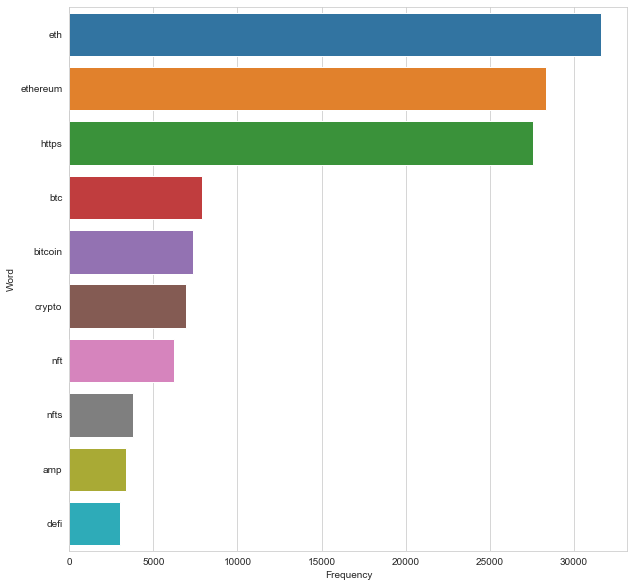

In [11]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

# SentimentIntensityAnalyzer for getting sentiments

In [12]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [13]:
data["Polarity"] = data["tweet"].apply(sentiment)

In [14]:
data = data[['date','time','tweet','Polarity']]

In [15]:
data.tail()

,date,time,tweet,Polarity
26578,2021-01-01,09:10:30,✨🎨NFT GIVEAWAY!🎨✨ 7 lucky winners will receiv...,0.9622
26579,2021-01-01,02:36:03,My 2021 predictions for Ethereum: -Eth2 phase...,0.2023
26580,2021-01-01,02:21:05,🔮 2021 #Ethereum Predictions 🔮 • $420B locked...,0.0000
26581,2021-01-01,00:50:48,"67,270 with 2,170,914 ETH deposited. (1.6B @ 7...",0.6792
26582,2021-01-01,00:14:10,Have fun becoming rich. 🤗 $ETH ⟠ #Ethereum,0.8658


# Getting sentiments based on the popularity score

In [16]:
def sentiments(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [17]:
data['Sentiments'] = data.apply(sentiments, axis=1)

# sentiments with their counts

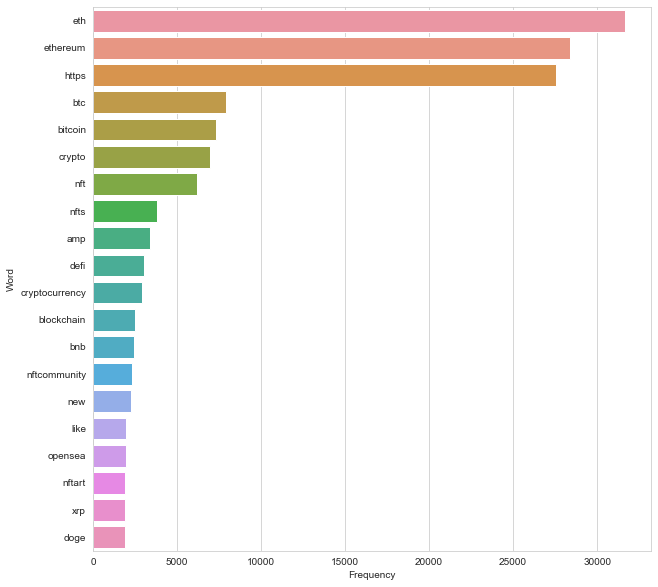

In [18]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(20))

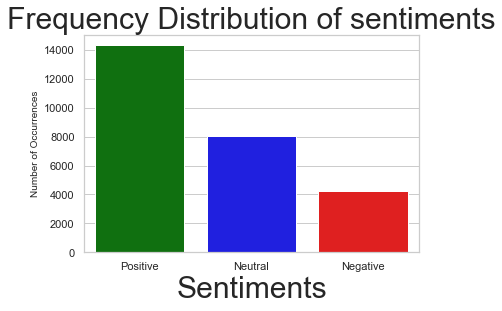

In [19]:
carrier_count = data["Sentiments"].value_counts()
sns.set(style="whitegrid")
sns.barplot(carrier_count.index, carrier_count.values, palette=dict(Neutral="blue", Positive="Green", Negative="Red"))
plt.title('Frequency Distribution of sentiments', fontsize=30)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Sentiments', fontsize=30)
plt.show()

### Loading dataset price data

In [20]:
api_key = '//' 
api_secret = '//'
client = Client(api_key, api_secret)
klines = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_4HOUR, "2021-01-01", "2022-01-01")
priceData = pd.DataFrame(klines)
priceData.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
priceData.index = [dt.datetime.fromtimestamp(x/1000.0) for x in priceData.close_time]
#priceData=priceData[['open', 'high', 'low', 'close']]
priceData=priceData[['close']]
priceData.head()
priceData = priceData.iloc[:-1 , :]

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [21]:
priceData.head() # showing the first 5 rows of data

,close
2021-01-01 03:59:59.999,744.82000000
2021-01-01 07:59:59.999,737.38000000
2021-01-01 11:59:59.999,738.85000000
2021-01-01 15:59:59.999,735.39000000
2021-01-01 19:59:59.999,725.34000000


### Five last records of data

In [22]:
priceData.tail() # showing the last 5 rows of data

,close
2021-12-31 07:59:59.999,3721.88000000
2021-12-31 11:59:59.999,3780.92000000
2021-12-31 15:59:59.999,3784.64000000
2021-12-31 19:59:59.999,3626.27000000
2021-12-31 23:59:59.999,3676.23000000


### Coloumns/features in data

In [23]:
priceData.columns #columns in data

Index(['close'], dtype='object')

### Length of data

In [24]:
print('lenght of data is', len(priceData)) #lenght of data

lenght of data is 2190


In [25]:
data['Sentiments'].value_counts()

Positive    14323
Neutral      8007
Negative     4253
Name: Sentiments, dtype: int64

### Shape of data

In [26]:
data.shape #shape of data

(26583, 5)

### Data information

In [27]:
data.info() #information of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26583 entries, 0 to 26582
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        26583 non-null  object 
 1   time        26583 non-null  object 
 2   tweet       26583 non-null  object 
 3   Polarity    26583 non-null  float64
 4   Sentiments  26583 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


In [28]:
a=data['Sentiments'].head(10)
aa=data['Sentiments'].value_counts()[0]
aa

14323

In [29]:
data.head(10-8)

,date,time,tweet,Polarity,Sentiments
0,2021-12-30,23:57:01,Look what I found! Two locks with cherry colle...,0.0000,Neutral
1,2021-12-30,23:50:13,Don’t forget to lock your tokens!😁 Time is al...,0.6588,Positive


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26583 entries, 0 to 26582
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        26583 non-null  object 
 1   time        26583 non-null  object 
 2   tweet       26583 non-null  object 
 3   Polarity    26583 non-null  float64
 4   Sentiments  26583 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


In [31]:
#data=data.head(1000)

In [32]:
data['Sentiments'].value_counts()

Positive    14323
Neutral      8007
Negative     4253
Name: Sentiments, dtype: int64

### Data types of all coloumns

In [33]:
data.dtypes #data types of data

date           object
time           object
tweet          object
Polarity      float64
Sentiments     object
dtype: object

### Checking missing Values

In [34]:
data[data.isnull().any(axis=1)].head() #checking the null values 

,date,time,tweet,Polarity,Sentiments


### Count of missing values

In [35]:
np.sum(data.isnull().any(axis=1)) #checking the null values 

0

### Is there any missing values?

In [36]:
data.isnull().values.any() #checking the null values 

False

In [37]:
data.iloc[9:25]

,date,time,tweet,Polarity,Sentiments
9,2021-12-30,22:21:16,"if you got the ENS airdrop, congratulations: ...",0.8271,Positive
10,2021-12-30,22:16:17,#eth #Ethereum https://t.co/nqG9EoF2Zc,0.0000,Neutral
11,2021-12-30,22:05:09,#NewProfilePic #BGK #BGKTAKEOVER #NFT #ETH #Et...,0.0000,Neutral
12,2021-12-30,21:53:25,We have been receiving a lot of questions aski...,-0.1027,Negative
13,2021-12-30,21:47:57,"On August 5th, EIP-1559 was implemented, integ...",0.0000,Neutral
14,2021-12-30,21:47:12,Gas DAO Community Giveaway ⛽️ I’m doing a NF...,0.9229,Positive
15,2021-12-30,21:06:28,146 days ago the #Ethereum network implemented...,-0.2263,Negative
16,2021-12-30,20:12:18,#NFTGIVEAWAY @bbvsea is giving away (1) Exot...,0.4215,Positive
17,2021-12-30,20:11:16,This is just the beginning for @mongoosecoinet...,-0.4215,Negative
18,2021-12-30,20:07:37,Everyone into #NFTs should peep to the @Arabi...,-0.8834,Negative


In [38]:
data.iloc[:25]

,date,time,tweet,Polarity,Sentiments
0,2021-12-30,23:57:01,Look what I found! Two locks with cherry colle...,0.0000,Neutral
1,2021-12-30,23:50:13,Don’t forget to lock your tokens!😁 Time is al...,0.6588,Positive
2,2021-12-30,23:43:25,0.3 ETH ($900) NFT Giveaway 🦘🦘 Partnered wit...,0.3818,Positive
3,2021-12-30,23:38:38,🎉#NFTGiveaway🎉 🎁One lucky winner will get a ...,0.9184,Positive
4,2021-12-30,23:29:45,"🦋""Daydream""🦋 is almost ready for you all !❤️🥀...",0.6122,Positive
5,2021-12-30,23:18:02,"Punk 8808 bought for 107 ETH ($397,449.36 USD)...",0.0000,Neutral
6,2021-12-30,22:44:43,🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢🟢 Join @MulChainCapital Upcoming $...,0.2960,Positive
7,2021-12-30,22:40:18,Aqui echando el rato hasta que bajen las fees ...,0.8074,Positive
8,2021-12-30,22:22:05,🎉#NFTGiveaway🎉 🎁Giving away 4 @LuckyHamsterS...,0.9286,Positive
9,2021-12-30,22:21:16,"if you got the ENS airdrop, congratulations: ...",0.8271,Positive


### Counts of missing values in each column

In [39]:
data.isnull().sum() #checking the null values columns wise 

date          0
time          0
tweet         0
Polarity      0
Sentiments    0
dtype: int64

In [40]:
#priceData['open']=priceData['open'].astype(float)
#priceData['high']=priceData['high'].astype(float)
#priceData['low']=priceData['low'].astype(float)
priceData['close']=priceData['close'].astype(float)

### Spliting date into day, month and year

In [41]:
priceData['date'] = priceData.index # taking dates in date column 
priceData.sort_index(ascending=True, inplace=True)
priceData['Month'] = priceData['date'].dt.month # extracting months from data
priceData['Day'] = priceData['date'].dt.day # extracting day from data
priceData['Year'] = priceData['date'].dt.year # extracting year from data
priceData['Hour'] = priceData['date'].dt.hour # extracting year from data
priceData['Minutes'] = priceData['date'].dt.minute # extracting year from data

### Close price with respect to year 

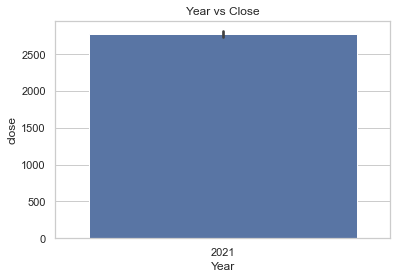

In [42]:
sns.barplot(x='Year', y='close', data=priceData).set(title='Year vs Close') # plotting the comparison of year and close price
plt.show() #showing the plot 

### Close price with respect to Month 

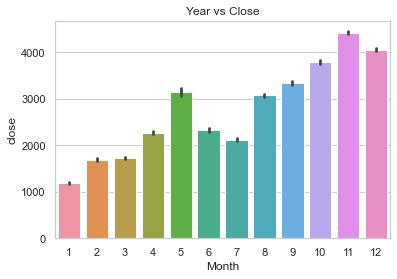

In [43]:
sns.barplot(x='Month', y='close', data=priceData).set(title='Year vs Close')  # plotting the comparison of month and close price
plt.show() #showing the plot 

# ------------------------------------------------------------------------------------------------------

# Merging entiment with price data

# ------------------------------------------------------------------------------------------------------

In [44]:
data.head()

,date,time,tweet,Polarity,Sentiments
0,2021-12-30,23:57:01,Look what I found! Two locks with cherry colle...,0.0000,Neutral
1,2021-12-30,23:50:13,Don’t forget to lock your tokens!😁 Time is al...,0.6588,Positive
2,2021-12-30,23:43:25,0.3 ETH ($900) NFT Giveaway 🦘🦘 Partnered wit...,0.3818,Positive
3,2021-12-30,23:38:38,🎉#NFTGiveaway🎉 🎁One lucky winner will get a ...,0.9184,Positive
4,2021-12-30,23:29:45,"🦋""Daydream""🦋 is almost ready for you all !❤️🥀...",0.6122,Positive


In [45]:
priceData.head(10)

,close,date,Month,Day,Year,Hour,Minutes
2021-01-01 03:59:59.999,744.82,2021-01-01 03:59:59.999,1,1,2021,3,59
2021-01-01 07:59:59.999,737.38,2021-01-01 07:59:59.999,1,1,2021,7,59
2021-01-01 11:59:59.999,738.85,2021-01-01 11:59:59.999,1,1,2021,11,59
2021-01-01 15:59:59.999,735.39,2021-01-01 15:59:59.999,1,1,2021,15,59
2021-01-01 19:59:59.999,725.34,2021-01-01 19:59:59.999,1,1,2021,19,59
2021-01-01 23:59:59.999,728.91,2021-01-01 23:59:59.999,1,1,2021,23,59
2021-01-02 03:59:59.999,730.39,2021-01-02 03:59:59.999,1,2,2021,3,59
2021-01-02 07:59:59.999,735.12,2021-01-02 07:59:59.999,1,2,2021,7,59
2021-01-02 11:59:59.999,729.70,2021-01-02 11:59:59.999,1,2,2021,11,59
2021-01-02 15:59:59.999,768.43,2021-01-02 15:59:59.999,1,2,2021,15,59


In [46]:
priceData['sentimentCount'] = 0

In [47]:
for i, row in enumerate(data.itertuples(), 1):
    if row.time >= "00:00:00" and row.time < "04:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "03:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "04:00:00" and row.time < "08:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "07:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "08:00:00" and row.time < "12:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "11:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "12:00:00" and row.time < "16:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "15:59:59" + ".999"), 'sentimentCount'] -= 1
    elif row.time >= "16:00:00" and row.time < "20:00:00":
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "19:59:59" + ".999"), 'sentimentCount'] -= 1
    else:
        if row.Sentiments == "Positive":
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] += 1
        elif row.Sentiments == "Negative":
            priceData.loc[priceData['date'] == (row.date + " " + "23:59:59" + ".999"), 'sentimentCount'] -= 1

In [48]:
priceData.loc[priceData['sentimentCount'] == 0]

,close,date,Month,Day,Year,Hour,Minutes,sentimentCount
2021-01-01 07:59:59.999,737.38,2021-01-01 07:59:59.999,1,1,2021,7,59,0
2021-01-02 15:59:59.999,768.43,2021-01-02 15:59:59.999,1,2,2021,15,59,0
2021-01-03 03:59:59.999,772.37,2021-01-03 03:59:59.999,1,3,2021,3,59,0
2021-01-04 11:59:59.999,976.80,2021-01-04 11:59:59.999,1,4,2021,11,59,0
2021-01-08 07:59:59.999,1208.42,2021-01-08 07:59:59.999,1,8,2021,7,59,0
...,...,...,...,...,...,...,...,...
2021-12-31 07:59:59.999,3721.88,2021-12-31 07:59:59.999,12,31,2021,7,59,0
2021-12-31 11:59:59.999,3780.92,2021-12-31 11:59:59.999,12,31,2021,11,59,0
2021-12-31 15:59:59.999,3784.64,2021-12-31 15:59:59.999,12,31,2021,15,59,0
2021-12-31 19:59:59.999,3626.27,2021-12-31 19:59:59.999,12,31,2021,19,59,0


In [49]:
priceData.iloc[2150:]

,close,date,Month,Day,Year,Hour,Minutes,sentimentCount
2021-12-25 11:59:59.999,4051.59,2021-12-25 11:59:59.999,12,25,2021,11,59,0
2021-12-25 15:59:59.999,4079.04,2021-12-25 15:59:59.999,12,25,2021,15,59,7
2021-12-25 19:59:59.999,4076.89,2021-12-25 19:59:59.999,12,25,2021,19,59,7
2021-12-25 23:59:59.999,4094.83,2021-12-25 23:59:59.999,12,25,2021,23,59,1
2021-12-26 03:59:59.999,4013.21,2021-12-26 03:59:59.999,12,26,2021,3,59,0
2021-12-26 07:59:59.999,4037.27,2021-12-26 07:59:59.999,12,26,2021,7,59,0
2021-12-26 11:59:59.999,4033.01,2021-12-26 11:59:59.999,12,26,2021,11,59,0
2021-12-26 15:59:59.999,4053.85,2021-12-26 15:59:59.999,12,26,2021,15,59,0
2021-12-26 19:59:59.999,4076.10,2021-12-26 19:59:59.999,12,26,2021,19,59,12
2021-12-26 23:59:59.999,4063.56,2021-12-26 23:59:59.999,12,26,2021,23,59,6


# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

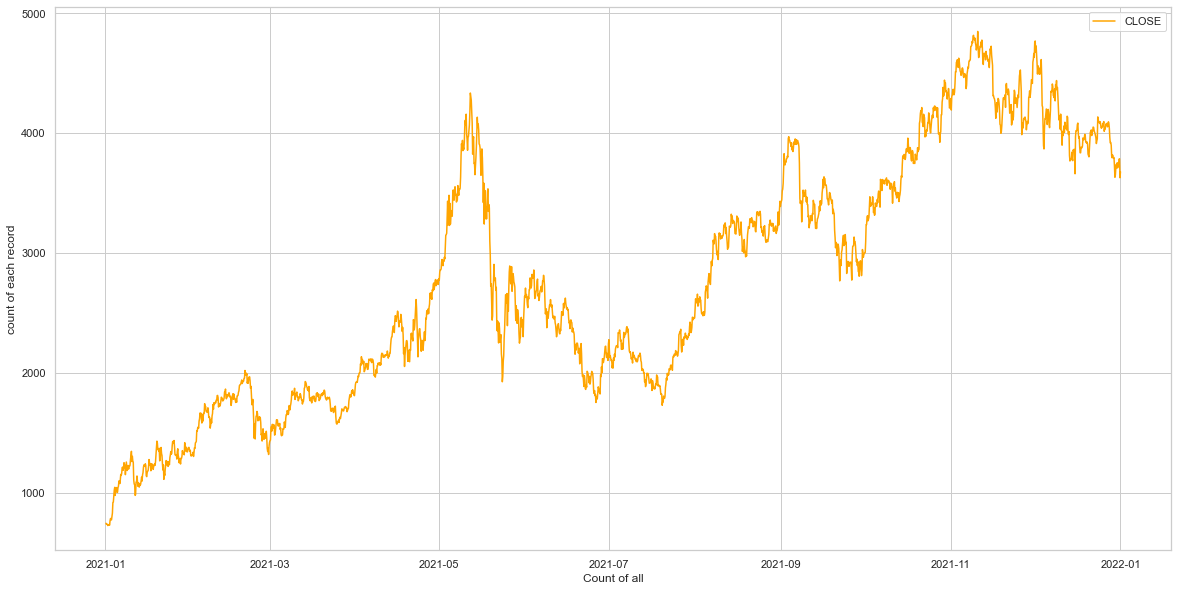

In [50]:
plt.figure(figsize=(20, 10)) #setting the width and height of the plot 
plt.subplot(1,1,1) #plot setting 
plt.plot(priceData.index, priceData['close'].values,color='orange',label='CLOSE') # plotting Close price 
plt.xlabel('Count of all') # x axis 
plt.ylabel('count of each record') # y axis 
plt.legend(loc='best') #legend name as Close 
plt.show() # showing the plot 

# ------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [51]:
X=priceData.drop(columns=['close','date']) #dropping the 'Close','date'
X[X< 0] = 0 #making all negative values as 0
X #input features 

,Month,Day,Year,Hour,Minutes,sentimentCount
2021-01-01 03:59:59.999,1,1,2021,3,59,3
2021-01-01 07:59:59.999,1,1,2021,7,59,0
2021-01-01 11:59:59.999,1,1,2021,11,59,1
2021-01-01 15:59:59.999,1,1,2021,15,59,1
2021-01-01 19:59:59.999,1,1,2021,19,59,2
...,...,...,...,...,...,...
2021-12-31 07:59:59.999,12,31,2021,7,59,0
2021-12-31 11:59:59.999,12,31,2021,11,59,0
2021-12-31 15:59:59.999,12,31,2021,15,59,0
2021-12-31 19:59:59.999,12,31,2021,19,59,0


### Taking target as output

In [52]:
y=priceData['close'] # output close 
y #output 

2021-01-01 03:59:59.999     744.82
2021-01-01 07:59:59.999     737.38
2021-01-01 11:59:59.999     738.85
2021-01-01 15:59:59.999     735.39
2021-01-01 19:59:59.999     725.34
                            ...   
2021-12-31 07:59:59.999    3721.88
2021-12-31 11:59:59.999    3780.92
2021-12-31 15:59:59.999    3784.64
2021-12-31 19:59:59.999    3626.27
2021-12-31 23:59:59.999    3676.23
Name: close, Length: 2190, dtype: float64

### Spliting the data into training and Testing

In [53]:
X_train = X[:int(trainTestSplit*(len(X)))] # training input features split 
X_test = X[int(trainTestSplit*(len(X))):]  # testing input features split 

y_train = y[:int(trainTestSplit*(len(y)))]  # training output split 
y_test = y[int(trainTestSplit*(len(y))):] # testing output split 

# --------------------------------------------------------------------------------------------------

# SARIMAX

In [54]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=arima_order,seasonal_order=(1,1,1,12))
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=468.712
ARIMA(0, 0, 1) RMSE=495.324
ARIMA(0, 0, 2) RMSE=501.131
ARIMA(0, 1, 0) RMSE=438.288
ARIMA(0, 1, 1) RMSE=437.740
ARIMA(0, 1, 2) RMSE=438.273
ARIMA(0, 2, 0) RMSE=15635.843
ARIMA(0, 2, 1) RMSE=395.488
ARIMA(0, 2, 2) RMSE=392.479
ARIMA(1, 0, 0) RMSE=571.239
ARIMA(1, 0, 1) RMSE=513.651
ARIMA(1, 0, 2) RMSE=474.800
ARIMA(1, 1, 0) RMSE=437.765
ARIMA(1, 1, 1) RMSE=437.891
ARIMA(1, 1, 2) RMSE=438.415
ARIMA(1, 2, 0) RMSE=14142.304
ARIMA(1, 2, 1) RMSE=392.837
ARIMA(1, 2, 2) RMSE=392.712
ARIMA(2, 0, 0) RMSE=523.921
ARIMA(2, 0, 1) RMSE=388.096
ARIMA(2, 0, 2) RMSE=402.727
ARIMA(2, 1, 0) RMSE=438.147
ARIMA(2, 1, 1) RMSE=438.303
ARIMA(2, 1, 2) RMSE=438.230
ARIMA(2, 2, 0) RMSE=10268.177
ARIMA(2, 2, 1) RMSE=392.699
ARIMA(2, 2, 2) RMSE=392.306
ARIMA(4, 0, 0) RMSE=470.601
ARIMA(4, 0, 1) RMSE=392.188
LU decomposition error.
ARIMA(4, 1, 0) RMSE=438.199
ARIMA(4, 1, 1) RMSE=437.590
ARIMA(4, 1, 2) RMSE=404.996
ARIMA(4, 2, 0) RMSE=6298.031
ARIMA(4, 2, 1) RMSE=392.728
ARIMA(4, 2, 2) RM

In [55]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=(best_cfg),seasonal_order=(1,1,1,12))
results=model.fit()

In [56]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
predSeries = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [57]:
test_mse1=mean_squared_error(y_test,predSeries) # calculating the mse score
print('Mean Squared Error: ', round(test_mse1,5)) #pritng the results 

Mean Squared Error:  150618.61638


# MAE

In [58]:
test_MAE1=mean_absolute_error(y_test,predSeries) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE1,5)) #pritng the results 

Mean Absolute Error:  312.9583


# RMSE

In [59]:
test_rmse1=np.sqrt(test_mse1) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse1,5)) #pritng the results 

Mean Squared Error:  388.09614


# MAPE

In [60]:
test_mape1=mean_absolute_percentage_error(y_test,predSeries) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape1,5)) #pritng the results 

Mean Absolute Error:  0.07174


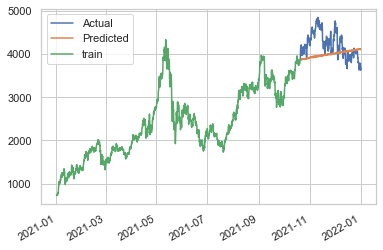

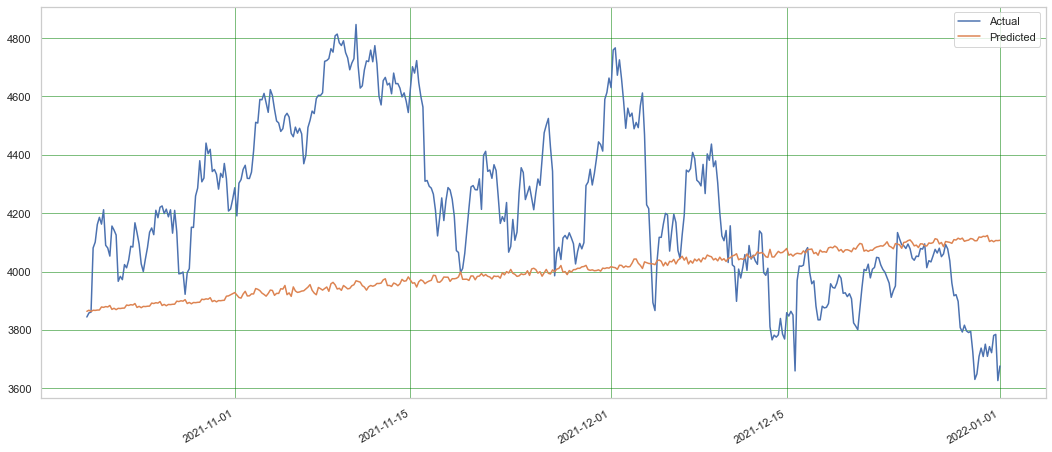

In [61]:
df = pd.DataFrame({'Actual': test_data['close'], 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data['close']})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# ARIMAX

In [62]:
%%time
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(priceData, arima_order):
    Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
    train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

    df5 = test_data.copy()
    df5['close'].loc[:] = np.nan

    df6 = pd.concat([train_data,df5])

    model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=arima_order)
    results=model.fit()

    preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test_data['close'], preds.tolist()))

    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(priceData, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(priceData, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg
 
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(priceData, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=2990.758
ARIMA(0, 0, 1) RMSE=4157.684
ARIMA(0, 0, 2) RMSE=4178.703
ARIMA(0, 1, 0) RMSE=435.093
ARIMA(0, 1, 1) RMSE=438.025
ARIMA(0, 1, 2) RMSE=434.993
ARIMA(0, 2, 0) RMSE=15119.953
ARIMA(0, 2, 1) RMSE=443.422
ARIMA(0, 2, 2) RMSE=439.502
ARIMA(1, 0, 0) RMSE=602.920
ARIMA(1, 0, 1) RMSE=465.317
ARIMA(1, 0, 2) RMSE=435.736
ARIMA(1, 1, 0) RMSE=437.926
ARIMA(1, 1, 1) RMSE=437.163
ARIMA(1, 1, 2) RMSE=434.297
ARIMA(1, 2, 0) RMSE=13412.550
ARIMA(1, 2, 1) RMSE=439.718
ARIMA(1, 2, 2) RMSE=439.851
ARIMA(2, 0, 0) RMSE=452.438
ARIMA(2, 0, 1) RMSE=1800.202
ARIMA(2, 0, 2) RMSE=7473.081
ARIMA(2, 1, 0) RMSE=435.630
ARIMA(2, 1, 1) RMSE=434.839
ARIMA(2, 1, 2) RMSE=433.188
ARIMA(2, 2, 0) RMSE=9821.085
ARIMA(2, 2, 1) RMSE=440.045
ARIMA(2, 2, 2) RMSE=439.211
ARIMA(4, 0, 0) RMSE=2276.901
ARIMA(4, 0, 1) RMSE=247338149897.329
LU decomposition error.
ARIMA(4, 1, 0) RMSE=435.468
ARIMA(4, 1, 1) RMSE=440.194
ARIMA(4, 1, 2) RMSE=440.945
ARIMA(4, 2, 0) RMSE=6184.419
ARIMA(4, 2, 1) RMSE=440.214
ARI

In [63]:
Xtest = priceData.drop(columns=['date','Month','Day','Year','Minutes','Hour'])
train_data, test_data = Xtest.iloc[:int(len(Xtest['close'])*trainTestSplit)], Xtest.iloc[int(len(Xtest['close'])*trainTestSplit):]

df5 = test_data.copy()
df5['close'].loc[:] = np.nan

df6 = pd.concat([train_data,df5])

model=smapi.tsa.statespace.SARIMAX(df6['close'],exog=df6['sentimentCount'],order=(best_cfg))
results=model.fit()

In [64]:
preds =results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic = True)
predSeries = pd.Series(preds.tolist(), index = test_data.index)

# Evaluation Measures on Test data

# MSE

In [65]:
test_mse2=mean_squared_error(y_test,predSeries) # calculating the mse score
print('Mean Squared Error: ', round(test_mse2,5)) #pritng the results 

Mean Squared Error:  184964.85516


# MAE

In [66]:
test_MAE2=mean_absolute_error(y_test,predSeries) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE2,5)) #pritng the results 

Mean Absolute Error:  352.65505


# RMSE

In [67]:
test_rmse2=np.sqrt(test_mse2) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse2,5)) #pritng the results 

Mean Squared Error:  430.07541


# MAPE

In [68]:
test_mape2=mean_absolute_percentage_error(y_test,predSeries) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape2,5)) #pritng the results 

Mean Absolute Error:  0.0803


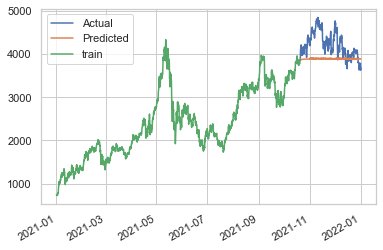

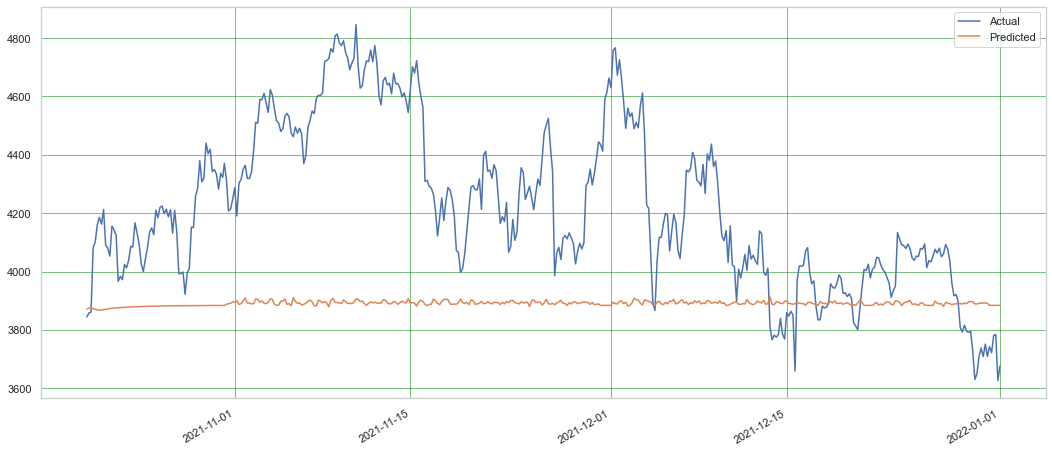

In [69]:
df = pd.DataFrame({'Actual': test_data['close'], 'Predicted': predSeries})
df2 = pd.DataFrame({'train': train_data['close']})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# --------------------------------------------------------------------------------------------------

# MLP Regression Model

### Parametrs

In [70]:
params = { 
    'max_iter': [100,200,300,400,500,600],
    'momentum':[0.7,0.8,0.9],
    'learning_rate_init':[0.001,0.002,0.004],
    'hidden_layer_sizes':[(100,),(300,),(200,)]
}

In [71]:
%%time
mlp=MLPRegressor(verbose=True) # calling MLP model for training 
Model_R = RandomizedSearchCV(estimator = mlp, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Iteration 1, loss = 4475262.43726273
Iteration 2, loss = 3990487.48909421
Iteration 3, loss = 3539394.18280385
Iteration 4, loss = 3126597.86279135
Iteration 5, loss = 2748467.23714288
Iteration 6, loss = 2400897.82643089
Iteration 7, loss = 2086008.97723295
Iteration 8, loss = 1800869.77608455
Iteration 9, loss = 1541730.62070761
Iteration 10, loss = 1309487.04207734
Iteration 11, loss = 1103179.10811819
Iteration 12, loss = 922574.80709162
Iteration 13, loss = 765079.23635079
Iteration 14, loss = 630832.88271484
Iteration 15, loss = 520679.57223694
Iteration 16, loss = 430246.63401617
Iteration 17, loss = 357929.17913088
Iteration 18, loss = 303107.74428915
Iteration 19, loss = 262434.35935244
Iteration 20, loss = 233038.34076921
Iteration 21, loss = 212857.09529010
Iteration 22, loss = 200234.13505771
Iteration 23, loss = 192129.92075087
Iteration 24, loss = 187661.42000382
Iteration 25, loss = 185267.92195273
Iteration 26, loss = 184332.94826693
Iteration 27, loss = 183816.79733381

Iteration 232, loss = 170187.10462190
Iteration 233, loss = 169941.86388505
Iteration 234, loss = 169826.94526089
Iteration 235, loss = 169761.45110942
Iteration 236, loss = 169740.93509186
Iteration 237, loss = 169479.60672221
Iteration 238, loss = 169303.62090617
Iteration 239, loss = 169475.46386204
Iteration 240, loss = 169054.49039401
Iteration 241, loss = 169247.35600200
Iteration 242, loss = 168944.12031317
Iteration 243, loss = 168656.40671103
Iteration 244, loss = 169066.40207923
Iteration 245, loss = 168847.76864958
Iteration 246, loss = 168602.65292203
Iteration 247, loss = 168322.09031268
Iteration 248, loss = 168267.78156738
Iteration 249, loss = 168219.72209542
Iteration 250, loss = 168030.23074152
Iteration 251, loss = 167818.54247104
Iteration 252, loss = 167830.17638436
Iteration 253, loss = 168147.38377505
Iteration 254, loss = 167427.44166183
Iteration 255, loss = 168691.48583347
Iteration 256, loss = 167799.03459435
Iteration 257, loss = 167445.85859328
Iteration 25

Iteration 151, loss = 266584.77187810
Iteration 152, loss = 265028.74478925
Iteration 153, loss = 265404.13809394
Iteration 154, loss = 265809.14245651
Iteration 155, loss = 264795.92230771
Iteration 156, loss = 264206.34725223
Iteration 157, loss = 263974.52952305
Iteration 158, loss = 263593.33829727
Iteration 159, loss = 263476.61071754
Iteration 160, loss = 263262.48756694
Iteration 161, loss = 262978.40215913
Iteration 162, loss = 262587.05979220
Iteration 163, loss = 262314.85264654
Iteration 164, loss = 261951.49882497
Iteration 165, loss = 261658.25627160
Iteration 166, loss = 261390.45409403
Iteration 167, loss = 261000.31404873
Iteration 168, loss = 260964.25022050
Iteration 169, loss = 260672.71332122
Iteration 170, loss = 260360.55974826
Iteration 171, loss = 259709.24148675
Iteration 172, loss = 259780.21422315
Iteration 173, loss = 259586.22460326
Iteration 174, loss = 258971.82824238
Iteration 175, loss = 258634.10166366
Iteration 176, loss = 258247.56191010
Iteration 17

Iteration 75, loss = 267407.41645940
Iteration 76, loss = 266736.19677308
Iteration 77, loss = 266236.66323336
Iteration 78, loss = 265824.95393221
Iteration 79, loss = 265749.80037278
Iteration 80, loss = 265402.79747331
Iteration 81, loss = 264325.92376499
Iteration 82, loss = 264400.73897545
Iteration 83, loss = 264963.22517089
Iteration 84, loss = 263345.06225984
Iteration 85, loss = 262764.13267424
Iteration 86, loss = 261992.98778976
Iteration 87, loss = 261486.21458425
Iteration 88, loss = 261071.02596553
Iteration 89, loss = 260472.32620699
Iteration 90, loss = 259909.12297693
Iteration 91, loss = 259366.21322030
Iteration 92, loss = 259137.33310980
Iteration 93, loss = 258608.68218200
Iteration 94, loss = 257401.39819464
Iteration 95, loss = 258017.74588755
Iteration 96, loss = 256551.18834166
Iteration 97, loss = 256493.85196217
Iteration 98, loss = 255354.91582520
Iteration 99, loss = 255232.49947098
Iteration 100, loss = 254448.62832135
Iteration 101, loss = 254222.41858320

Iteration 323, loss = 140433.58271379
Iteration 324, loss = 138417.68783963
Iteration 325, loss = 137748.17114214
Iteration 326, loss = 139003.89867474
Iteration 327, loss = 140395.30762638
Iteration 328, loss = 139180.11160592
Iteration 329, loss = 136277.02164840
Iteration 330, loss = 136311.65456937
Iteration 331, loss = 135845.75374612
Iteration 332, loss = 136829.74778700
Iteration 333, loss = 138078.10470847
Iteration 334, loss = 136059.59658898
Iteration 335, loss = 135493.85194910
Iteration 336, loss = 134390.98775682
Iteration 337, loss = 135897.19969899
Iteration 338, loss = 134470.65083724
Iteration 339, loss = 134683.03292904
Iteration 340, loss = 133158.52330365
Iteration 341, loss = 134119.16164566
Iteration 342, loss = 136882.05010692
Iteration 343, loss = 137899.75376765
Iteration 344, loss = 134777.63573928
Iteration 345, loss = 133328.65533032
Iteration 346, loss = 131739.13747709
Iteration 347, loss = 130385.68791079
Iteration 348, loss = 131204.57504837
Iteration 34

Iteration 167, loss = 166396.37096502
Iteration 168, loss = 166148.08178112
Iteration 169, loss = 165951.10030101
Iteration 170, loss = 165866.37997358
Iteration 171, loss = 166305.26971296
Iteration 172, loss = 165511.81158359
Iteration 173, loss = 166403.48442092
Iteration 174, loss = 165244.29752403
Iteration 175, loss = 165376.54377621
Iteration 176, loss = 164969.76333212
Iteration 177, loss = 165038.71461132
Iteration 178, loss = 165266.32816973
Iteration 179, loss = 164649.91242484
Iteration 180, loss = 164502.38745498
Iteration 181, loss = 164202.54943838
Iteration 182, loss = 164186.35443853
Iteration 183, loss = 164003.26643356
Iteration 184, loss = 164145.89266059
Iteration 185, loss = 163974.92307643
Iteration 186, loss = 163627.16032548
Iteration 187, loss = 163385.70202360
Iteration 188, loss = 163428.62908443
Iteration 189, loss = 163498.78536585
Iteration 190, loss = 163059.76248581
Iteration 191, loss = 162733.91662554
Iteration 192, loss = 162882.06958613
Iteration 19

Iteration 22, loss = 183029.80294983
Iteration 23, loss = 182942.58180350
Iteration 24, loss = 182934.06789640
Iteration 25, loss = 182881.55932337
Iteration 26, loss = 182814.42659435
Iteration 27, loss = 182674.69973282
Iteration 28, loss = 182630.17653048
Iteration 29, loss = 182645.86700323
Iteration 30, loss = 182553.14827548
Iteration 31, loss = 182400.27951019
Iteration 32, loss = 182351.56549737
Iteration 33, loss = 182245.43402571
Iteration 34, loss = 182145.72153609
Iteration 35, loss = 182093.28701707
Iteration 36, loss = 181971.39327122
Iteration 37, loss = 181836.14306630
Iteration 38, loss = 181745.87813754
Iteration 39, loss = 181600.56199601
Iteration 40, loss = 181547.13389497
Iteration 41, loss = 181268.09406741
Iteration 42, loss = 180922.06204126
Iteration 43, loss = 180932.23130065
Iteration 44, loss = 180630.67954686
Iteration 45, loss = 180638.12833617
Iteration 46, loss = 180280.13479450
Iteration 47, loss = 180279.34052686
Iteration 48, loss = 179825.50549306
I

Iteration 248, loss = 118033.49400551
Iteration 249, loss = 117469.50219031
Iteration 250, loss = 116674.87407146
Iteration 251, loss = 115987.83920026
Iteration 252, loss = 115903.70788767
Iteration 253, loss = 115110.16954429
Iteration 254, loss = 114707.36352643
Iteration 255, loss = 114411.57160572
Iteration 256, loss = 114128.21257852
Iteration 257, loss = 114774.69512392
Iteration 258, loss = 114549.28013466
Iteration 259, loss = 114065.75067212
Iteration 260, loss = 112752.93646971
Iteration 261, loss = 112175.33345237
Iteration 262, loss = 114352.07705390
Iteration 263, loss = 112940.26190890
Iteration 264, loss = 111905.62347078
Iteration 265, loss = 111989.75343517
Iteration 266, loss = 110243.14346535
Iteration 267, loss = 110336.39717051
Iteration 268, loss = 109538.37172924
Iteration 269, loss = 112322.31624714
Iteration 270, loss = 111075.06987544
Iteration 271, loss = 110453.54205904
Iteration 272, loss = 107952.28368572
Iteration 273, loss = 107763.11359462
Iteration 27

Iteration 474, loss = 64853.26610129
Iteration 475, loss = 63452.66236380
Iteration 476, loss = 63327.83732571
Iteration 477, loss = 63370.10060586
Iteration 478, loss = 63444.25922805
Iteration 479, loss = 65092.33789844
Iteration 480, loss = 64370.76918664
Iteration 481, loss = 64006.22237178
Iteration 482, loss = 65227.93561491
Iteration 483, loss = 64478.35530318
Iteration 484, loss = 62775.26599091
Iteration 485, loss = 64032.27871170
Iteration 486, loss = 65063.09275899
Iteration 487, loss = 63807.81239726
Iteration 488, loss = 63719.46193895
Iteration 489, loss = 62346.66939265
Iteration 490, loss = 62441.56989912
Iteration 491, loss = 62572.36267477
Iteration 492, loss = 63917.79832616
Iteration 493, loss = 62692.55758194
Iteration 494, loss = 63335.00666202
Iteration 495, loss = 62511.71604087
Iteration 496, loss = 63488.96082932
Iteration 497, loss = 63042.08911733
Iteration 498, loss = 63389.14998253
Iteration 499, loss = 61634.72693353
Iteration 500, loss = 61571.48894547
I

Iteration 167, loss = 177709.48491492
Iteration 168, loss = 175106.02731346
Iteration 169, loss = 174088.40193612
Iteration 170, loss = 173328.20063210
Iteration 171, loss = 172679.93249338
Iteration 172, loss = 171770.33406286
Iteration 173, loss = 171744.02163286
Iteration 174, loss = 172148.00557181
Iteration 175, loss = 170430.58708673
Iteration 176, loss = 169144.78572702
Iteration 177, loss = 168790.17140545
Iteration 178, loss = 167622.33379303
Iteration 179, loss = 167796.55470960
Iteration 180, loss = 166357.17355051
Iteration 181, loss = 166571.88967708
Iteration 182, loss = 167797.06378170
Iteration 183, loss = 165415.00488165
Iteration 184, loss = 165277.27329212
Iteration 185, loss = 163654.78582128
Iteration 186, loss = 164520.11201546
Iteration 187, loss = 162158.94145873
Iteration 188, loss = 162343.50342179
Iteration 189, loss = 160484.47184136
Iteration 190, loss = 160142.45274881
Iteration 191, loss = 159439.66869987
Iteration 192, loss = 159277.53265307
Iteration 19

Iteration 403, loss = 83915.33485645
Iteration 404, loss = 84766.44935861
Iteration 405, loss = 87644.59122373
Iteration 406, loss = 86305.36536042
Iteration 407, loss = 84347.23659701
Iteration 408, loss = 82366.78722472
Iteration 409, loss = 80002.17808021
Iteration 410, loss = 80200.28459167
Iteration 411, loss = 79951.69523065
Iteration 412, loss = 80127.88181281
Iteration 413, loss = 79967.03666296
Iteration 414, loss = 79585.22167228
Iteration 415, loss = 79307.11810475
Iteration 416, loss = 79673.38021468
Iteration 417, loss = 79644.06362473
Iteration 418, loss = 79145.57252570
Iteration 419, loss = 79697.87809192
Iteration 420, loss = 77616.40007893
Iteration 421, loss = 78806.46455989
Iteration 422, loss = 79205.88766152
Iteration 423, loss = 77116.71071882
Iteration 424, loss = 77482.62664095
Iteration 425, loss = 78251.03473839
Iteration 426, loss = 78874.14298067
Iteration 427, loss = 76393.77219369
Iteration 428, loss = 77137.50008460
Iteration 429, loss = 80271.97421757
I

Iteration 58, loss = 182939.78385701
Iteration 59, loss = 182904.51139450
Iteration 60, loss = 182873.02048471
Iteration 61, loss = 182812.21105189
Iteration 62, loss = 182792.27181146
Iteration 63, loss = 182755.01677619
Iteration 64, loss = 182695.61868606
Iteration 65, loss = 182723.54427145
Iteration 66, loss = 182641.01253150
Iteration 67, loss = 182596.35375097
Iteration 68, loss = 182538.66564260
Iteration 69, loss = 182561.62680069
Iteration 70, loss = 182486.78815776
Iteration 71, loss = 182412.70584419
Iteration 72, loss = 182373.84655257
Iteration 73, loss = 182306.78531462
Iteration 74, loss = 182272.35345729
Iteration 75, loss = 182236.02538327
Iteration 76, loss = 182225.21122686
Iteration 77, loss = 182156.46893335
Iteration 78, loss = 182078.33065954
Iteration 79, loss = 182158.04942724
Iteration 80, loss = 181981.46801706
Iteration 81, loss = 181924.95713949
Iteration 82, loss = 181838.06406130
Iteration 83, loss = 181799.04233836
Iteration 84, loss = 181690.99447852
I

Iteration 106, loss = 181647.88811018
Iteration 107, loss = 181728.12856367
Iteration 108, loss = 181579.20368542
Iteration 109, loss = 181402.44977000
Iteration 110, loss = 181336.79705443
Iteration 111, loss = 181273.69654333
Iteration 112, loss = 181192.02864970
Iteration 113, loss = 181095.22519711
Iteration 114, loss = 180983.06798526
Iteration 115, loss = 180931.33202694
Iteration 116, loss = 180823.74334354
Iteration 117, loss = 180750.31083269
Iteration 118, loss = 180660.77842632
Iteration 119, loss = 180627.72292419
Iteration 120, loss = 180627.85380256
Iteration 121, loss = 180406.51303484
Iteration 122, loss = 180311.64469158
Iteration 123, loss = 180247.77086487
Iteration 124, loss = 180164.38454393
Iteration 125, loss = 179973.19736397
Iteration 126, loss = 179879.25439059
Iteration 127, loss = 179751.79942770
Iteration 128, loss = 179579.16922211
Iteration 129, loss = 179508.01556163
Iteration 130, loss = 179425.59767539
Iteration 131, loss = 179274.14322632
Iteration 13

Iteration 26, loss = 281138.04190801
Iteration 27, loss = 281075.54970342
Iteration 28, loss = 281008.44875371
Iteration 29, loss = 280925.39377093
Iteration 30, loss = 280884.35533638
Iteration 31, loss = 280783.02130020
Iteration 32, loss = 280813.78503699
Iteration 33, loss = 280678.74575788
Iteration 34, loss = 280543.74866670
Iteration 35, loss = 280475.37218454
Iteration 36, loss = 280411.86778022
Iteration 37, loss = 280338.06173451
Iteration 38, loss = 280264.27212579
Iteration 39, loss = 280161.96786903
Iteration 40, loss = 280124.42201950
Iteration 41, loss = 280092.76111016
Iteration 42, loss = 279931.24103388
Iteration 43, loss = 279840.13447367
Iteration 44, loss = 279847.16214601
Iteration 45, loss = 279719.50603689
Iteration 46, loss = 279600.66021708
Iteration 47, loss = 279477.52858684
Iteration 48, loss = 279503.72977991
Iteration 49, loss = 279386.74245530
Iteration 50, loss = 279338.23132234
Iteration 51, loss = 279290.62652735
Iteration 52, loss = 279194.92124951
I

Iteration 246, loss = 218586.37181715
Iteration 247, loss = 218940.44447694
Iteration 248, loss = 217725.27924146
Iteration 249, loss = 219831.19043974
Iteration 250, loss = 218175.09149957
Iteration 251, loss = 217731.10861960
Iteration 252, loss = 216216.18837239
Iteration 253, loss = 215815.19083785
Iteration 254, loss = 215659.00786130
Iteration 255, loss = 214914.56131736
Iteration 256, loss = 214656.72611730
Iteration 257, loss = 214122.41422864
Iteration 258, loss = 213948.51955410
Iteration 259, loss = 213654.09302188
Iteration 260, loss = 213041.16977351
Iteration 261, loss = 212992.85431786
Iteration 262, loss = 212435.25325434
Iteration 263, loss = 211942.61665188
Iteration 264, loss = 211684.99164406
Iteration 265, loss = 211588.86677179
Iteration 266, loss = 210762.23888335
Iteration 267, loss = 210528.04400378
Iteration 268, loss = 210034.45386201
Iteration 269, loss = 210377.35897854
Iteration 270, loss = 208744.49146639
Iteration 271, loss = 210139.69503419
Iteration 27

Iteration 177, loss = 122742.54804709
Iteration 178, loss = 120608.57436930
Iteration 179, loss = 120059.36345500
Iteration 180, loss = 119767.04991968
Iteration 181, loss = 119185.67178605
Iteration 182, loss = 118590.74691131
Iteration 183, loss = 120440.85460301
Iteration 184, loss = 117015.83207427
Iteration 185, loss = 117172.25816388
Iteration 186, loss = 122629.56452395
Iteration 187, loss = 117898.34141642
Iteration 188, loss = 114711.19768238
Iteration 189, loss = 117720.79685781
Iteration 190, loss = 116920.46721386
Iteration 191, loss = 118045.29615153
Iteration 192, loss = 112636.07931450
Iteration 193, loss = 111958.87545007
Iteration 194, loss = 114146.14681093
Iteration 195, loss = 111687.16193382
Iteration 196, loss = 111671.07114774
Iteration 197, loss = 110395.08497753
Iteration 198, loss = 111707.12298314
Iteration 199, loss = 110737.64527503
Iteration 200, loss = 114330.98246360
Iteration 201, loss = 108716.08497554
Iteration 202, loss = 107027.43940368
Iteration 20

Iteration 114, loss = 180096.75705445
Iteration 115, loss = 184087.88471686
Iteration 116, loss = 180073.36851983
Iteration 117, loss = 177018.96690489
Iteration 118, loss = 177494.36899974
Iteration 119, loss = 176116.89245234
Iteration 120, loss = 173638.64993291
Iteration 121, loss = 172219.64062975
Iteration 122, loss = 172466.55153114
Iteration 123, loss = 170747.19110165
Iteration 124, loss = 169818.91116535
Iteration 125, loss = 169236.43341215
Iteration 126, loss = 168378.54583899
Iteration 127, loss = 167914.34602713
Iteration 128, loss = 165825.09095087
Iteration 129, loss = 164947.26340554
Iteration 130, loss = 164140.27502186
Iteration 131, loss = 163430.45457661
Iteration 132, loss = 162396.59988790
Iteration 133, loss = 163074.84914880
Iteration 134, loss = 160420.20913683
Iteration 135, loss = 161430.49202469
Iteration 136, loss = 158472.77472629
Iteration 137, loss = 157359.55639531
Iteration 138, loss = 155900.35925759
Iteration 139, loss = 155415.42342281
Iteration 14

Iteration 43, loss = 176269.78038602
Iteration 44, loss = 175559.94874046
Iteration 45, loss = 175052.85982536
Iteration 46, loss = 174146.20995122
Iteration 47, loss = 173883.97107967
Iteration 48, loss = 174416.69321914
Iteration 49, loss = 176570.38936934
Iteration 50, loss = 173434.00737334
Iteration 51, loss = 170504.84345949
Iteration 52, loss = 173119.85069288
Iteration 53, loss = 173407.29550707
Iteration 54, loss = 170737.90570948
Iteration 55, loss = 168229.92987706
Iteration 56, loss = 169637.41547818
Iteration 57, loss = 168069.92085917
Iteration 58, loss = 167089.42006202
Iteration 59, loss = 166867.22391149
Iteration 60, loss = 166141.18162752
Iteration 61, loss = 164843.26169461
Iteration 62, loss = 164581.33864512
Iteration 63, loss = 163784.51538015
Iteration 64, loss = 166016.44727714
Iteration 65, loss = 165729.30566317
Iteration 66, loss = 162348.10965865
Iteration 67, loss = 162208.62022109
Iteration 68, loss = 161334.77202351
Iteration 69, loss = 163102.63343889
I

Iteration 37, loss = 268619.89903680
Iteration 38, loss = 267273.75965200
Iteration 39, loss = 266620.85130055
Iteration 40, loss = 265112.43104754
Iteration 41, loss = 265980.99574995
Iteration 42, loss = 262116.50846191
Iteration 43, loss = 261600.97724174
Iteration 44, loss = 259778.88281963
Iteration 45, loss = 258349.69793067
Iteration 46, loss = 257668.46666459
Iteration 47, loss = 255176.92881034
Iteration 48, loss = 253536.69862441
Iteration 49, loss = 251692.81190063
Iteration 50, loss = 249658.41273805
Iteration 51, loss = 248496.31322139
Iteration 52, loss = 246286.48973049
Iteration 53, loss = 246574.42584985
Iteration 54, loss = 248126.63420322
Iteration 55, loss = 245415.14327360
Iteration 56, loss = 249826.61788403
Iteration 57, loss = 247615.96385770
Iteration 58, loss = 243660.12198031
Iteration 59, loss = 241171.54382230
Iteration 60, loss = 237513.96486852
Iteration 61, loss = 236771.48946678
Iteration 62, loss = 231135.60398842
Iteration 63, loss = 232139.61117615
I

Iteration 284, loss = 74823.76416083
Iteration 285, loss = 76914.61809597
Iteration 286, loss = 75843.53757077
Iteration 287, loss = 75518.62253054
Iteration 288, loss = 71844.64297348
Iteration 289, loss = 80081.08465088
Iteration 290, loss = 76372.95916799
Iteration 291, loss = 71886.36031912
Iteration 292, loss = 72284.91877703
Iteration 293, loss = 71059.27056134
Iteration 294, loss = 70440.20412051
Iteration 295, loss = 70297.03390399
Iteration 296, loss = 71204.63692236
Iteration 297, loss = 70676.59011732
Iteration 298, loss = 69518.98608700
Iteration 299, loss = 71473.08138526
Iteration 300, loss = 72260.77661711
Iteration 301, loss = 69937.40722261
Iteration 302, loss = 69639.17205226
Iteration 303, loss = 68623.70834786
Iteration 304, loss = 69759.93464526
Iteration 305, loss = 70316.73794258
Iteration 306, loss = 68382.05616611
Iteration 307, loss = 68420.96384756
Iteration 308, loss = 68589.73553167
Iteration 309, loss = 69239.47396443
Iteration 310, loss = 67405.67595261
I

Iteration 17, loss = 287852.96190871
Iteration 18, loss = 283936.51954056
Iteration 19, loss = 282263.23561710
Iteration 20, loss = 281534.42902807
Iteration 21, loss = 281524.54065584
Iteration 22, loss = 281535.68133478
Iteration 23, loss = 281573.59229612
Iteration 24, loss = 281468.25590036
Iteration 25, loss = 281366.75796815
Iteration 26, loss = 281238.64571944
Iteration 27, loss = 281169.74220808
Iteration 28, loss = 281098.49346487
Iteration 29, loss = 281034.15452027
Iteration 30, loss = 280971.08065792
Iteration 31, loss = 280902.24968286
Iteration 32, loss = 280841.64456780
Iteration 33, loss = 280789.72338064
Iteration 34, loss = 280730.84473709
Iteration 35, loss = 280640.92156708
Iteration 36, loss = 280573.82559595
Iteration 37, loss = 280554.82899269
Iteration 38, loss = 280433.23684018
Iteration 39, loss = 280352.14084470
Iteration 40, loss = 280314.50916515
Iteration 41, loss = 280223.65498380
Iteration 42, loss = 280196.33531647
Iteration 43, loss = 280087.70540214
I

Iteration 73, loss = 178216.97483967
Iteration 74, loss = 177924.58313100
Iteration 75, loss = 177664.39608886
Iteration 76, loss = 177578.12171302
Iteration 77, loss = 176795.40975477
Iteration 78, loss = 176993.14982445
Iteration 79, loss = 176491.29242630
Iteration 80, loss = 176528.61215553
Iteration 81, loss = 175610.55586948
Iteration 82, loss = 176014.80292594
Iteration 83, loss = 175176.33623601
Iteration 84, loss = 175183.30321268
Iteration 85, loss = 175239.20121371
Iteration 86, loss = 174773.29799187
Iteration 87, loss = 174864.53963792
Iteration 88, loss = 174707.25012087
Iteration 89, loss = 173859.67285322
Iteration 90, loss = 173827.65861368
Iteration 91, loss = 173387.77279058
Iteration 92, loss = 173127.29187705
Iteration 93, loss = 172152.55248377
Iteration 94, loss = 172370.39041722
Iteration 95, loss = 171770.68817146
Iteration 96, loss = 172098.41835511
Iteration 97, loss = 171099.29462600
Iteration 98, loss = 170812.19511289
Iteration 99, loss = 170988.05018813
I

Iteration 111, loss = 153921.30777037
Iteration 112, loss = 151546.71810425
Iteration 113, loss = 150693.97837388
Iteration 114, loss = 149558.72943259
Iteration 115, loss = 148363.74695733
Iteration 116, loss = 147911.40932379
Iteration 117, loss = 147262.68060921
Iteration 118, loss = 147779.98066686
Iteration 119, loss = 148019.67377830
Iteration 120, loss = 149300.88191667
Iteration 121, loss = 147711.07244498
Iteration 122, loss = 144763.33708627
Iteration 123, loss = 142671.55660056
Iteration 124, loss = 140107.45944478
Iteration 125, loss = 139488.46337074
Iteration 126, loss = 140980.46234183
Iteration 127, loss = 141211.55096303
Iteration 128, loss = 138924.73164479
Iteration 129, loss = 137569.20410145
Iteration 130, loss = 137190.62680819
Iteration 131, loss = 138093.46134229
Iteration 132, loss = 136120.12399797
Iteration 133, loss = 134130.95834486
Iteration 134, loss = 133250.36772663
Iteration 135, loss = 136240.49191081
Iteration 136, loss = 133338.82253788
Iteration 13

RandomizedSearchCV(cv=2, estimator=MLPRegressor(verbose=True),
                   param_distributions={'hidden_layer_sizes': [(100,), (300,),
                                                               (200,)],
                                        'learning_rate_init': [0.001, 0.002,
                                                               0.004],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600],
                                        'momentum': [0.7, 0.8, 0.9]})

### Best Parameter selected

In [72]:
Model_R.best_params_

{'momentum': 0.7,
 'max_iter': 400,
 'learning_rate_init': 0.002,
 'hidden_layer_sizes': (300,)}

# Evaluation Measures on Test data

# MSE

In [73]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse3=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse3,5)) #pritng the results 

Mean Squared Error:  2465600.1921


# MAE

In [74]:
test_MAE3=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE3,5)) #pritng the results 

Mean Absolute Error:  1435.57631


# RMSE

In [75]:
test_rmse3=np.sqrt(test_mse3) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse3,5)) #pritng the results 

Mean Squared Error:  1570.22298


# MAPE

In [76]:
test_mape3=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape3,5)) #pritng the results 

Mean Absolute Error:  0.33518


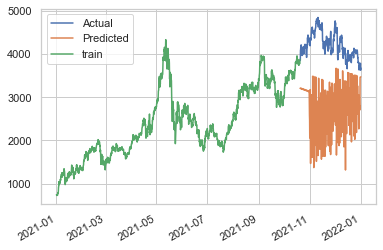

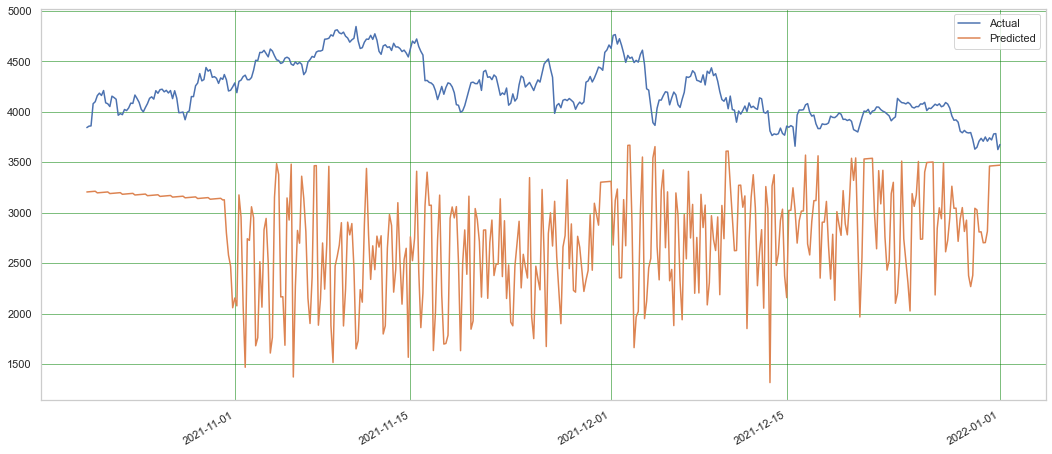

In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Ridge Regression Model

### Parametrs

In [78]:
params = { 
    'alpha': [1.0,2.0,3.0,4.0],
    'max_iter':[100,200,300,400,500],
    'tol':[0.001,0.002,0.003,0.004]
}

In [79]:
%%time
Ridge=linear_model.Ridge(alpha=4.0) # calling Ridge model for training 
Model_R = RandomizedSearchCV(estimator = Ridge, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 57.1 ms


RandomizedSearchCV(cv=2, estimator=Ridge(alpha=4.0),
                   param_distributions={'alpha': [1.0, 2.0, 3.0, 4.0],
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'tol': [0.001, 0.002, 0.003, 0.004]})

### Best Parameter selected

In [80]:
Model_R.best_params_

{'tol': 0.003, 'max_iter': 400, 'alpha': 4.0}

# Evaluation Measures on Test data

# MSE

In [81]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse7=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse7,5)) #pritng the results 

Mean Squared Error:  593000.34748


# MAE

In [82]:
test_MAE7=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE7,5)) #pritng the results 

Mean Absolute Error:  674.42058


# RMSE

In [83]:
test_rmse7=np.sqrt(test_mse7) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse7,5)) #pritng the results 

Mean Squared Error:  770.06516


# MAPE

In [84]:
test_mape7=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape7,5)) #pritng the results 

Mean Absolute Error:  0.15533


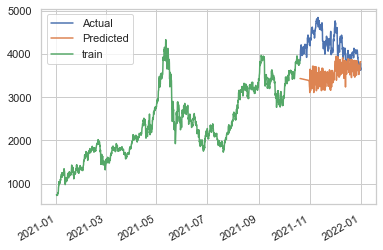

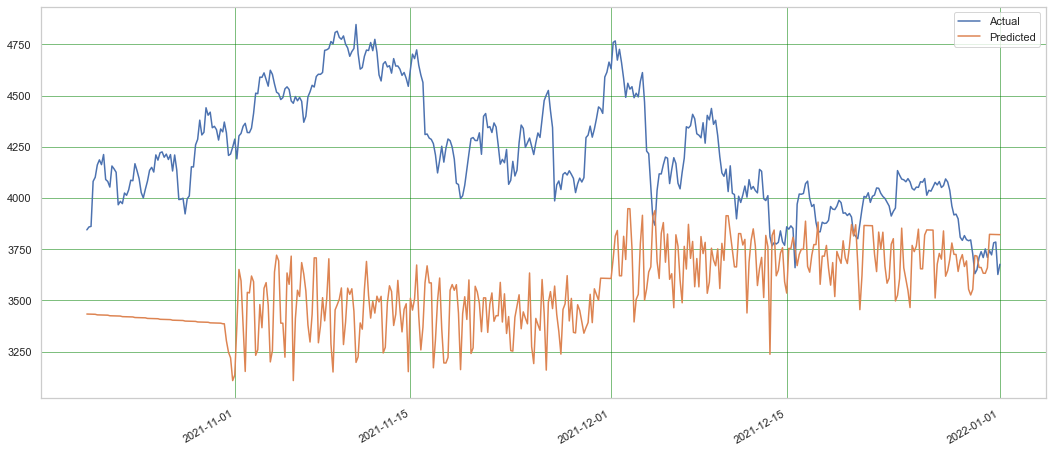

In [85]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regression Model

### Parametrs

In [86]:
params = { 
    'max_depth': [10,20,30,40,50],
    'random_state':[10,20,30,40],
    'min_samples_leaf':[10,20,30,40,50]
}

In [87]:
%%time
RF=RandomForestRegressor() # calling RF model for training 
Model_R = RandomizedSearchCV(estimator = RF, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 2.01 s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'random_state': [10, 20, 30, 40]})

### Best Parameter selected

In [88]:
Model_R.best_params_

{'random_state': 30, 'min_samples_leaf': 50, 'max_depth': 20}

# Evaluation Measures on Test data

# MSE

In [89]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse8=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse8,5)) #pritng the results 

Mean Squared Error:  829311.07041


# MAE

In [90]:
test_MAE8=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE8,5)) #pritng the results 

Mean Absolute Error:  871.973


# RMSE

In [91]:
test_rmse8=np.sqrt(test_mse8) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse8,5)) #pritng the results 

Mean Squared Error:  910.66518


# MAPE

In [92]:
test_mape8=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape8,5)) #pritng the results 

Mean Absolute Error:  0.20445


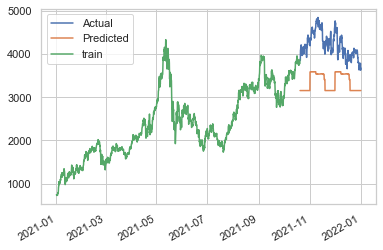

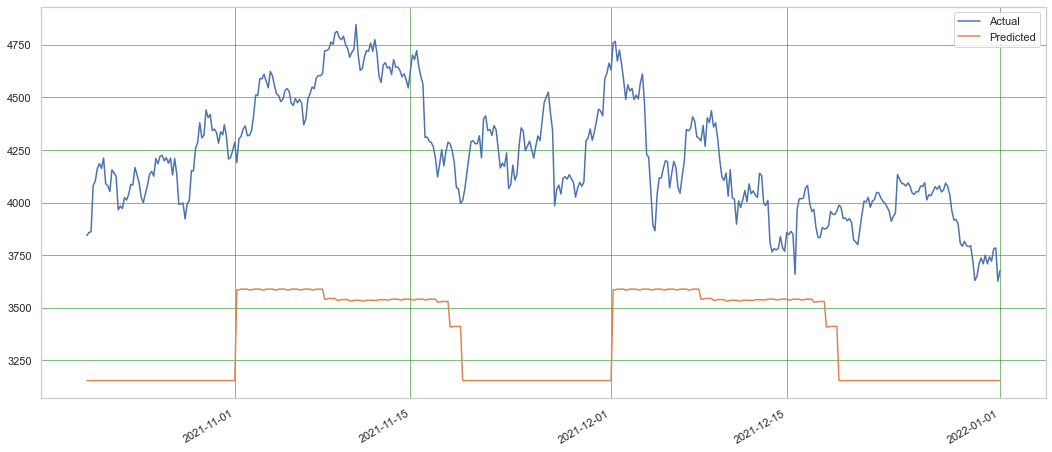

In [93]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# XGBoost Model

### Parametrs

In [94]:
params = { 
    'base_score': [0.1,0.2,0.3,0.4,0.5,0.6],
    'learning_rate':[0.1,0.2,0.3],
    'n_estimators':[100,200,300,400],
    'max_depth':[10,20,30,40,50]
    
}

In [95]:
%%time
XG=xgboost.XGBRegressor() # calling Xgboost model for training 
Model_R = RandomizedSearchCV(estimator = XG, param_distributions = params, cv = 2) #calling search and it will help to get the best parametrs
Model_R.fit(X_train, y_train) # Training this model

Wall time: 17.2 s


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

### Best Parameter selected

In [96]:
Model_R.best_params_

{'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'base_score': 0.2}

# Evaluation Measures on Test data

# MSE

In [97]:
y_pred_test=Model_R.predict(X_test) # tetsing trained model on test data
test_mse9=mean_squared_error(y_test,y_pred_test) # calculating the mse score
print('Mean Squared Error: ', round(test_mse9,5)) #pritng the results 

Mean Squared Error:  571290.40629


# MAE

In [98]:
test_MAE9=mean_absolute_error(y_test,y_pred_test) # calculating the mae score
print('Mean Absolute Error: ', round(test_MAE9,5)) #pritng the results 

Mean Absolute Error:  673.88166


# RMSE

In [99]:
test_rmse9=np.sqrt(test_mse9) # calculating the rmse score
print('Mean Squared Error: ', round(test_rmse9,5)) #pritng the results 

Mean Squared Error:  755.83755


# MAPE

In [100]:
test_mape9=mean_absolute_percentage_error(y_test,y_pred_test) # calculating the mape score
print('Mean Absolute Error: ', round(test_mape9,5)) #pritng the results 

Mean Absolute Error:  0.1556


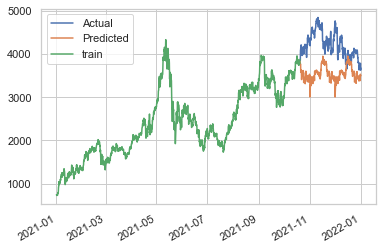

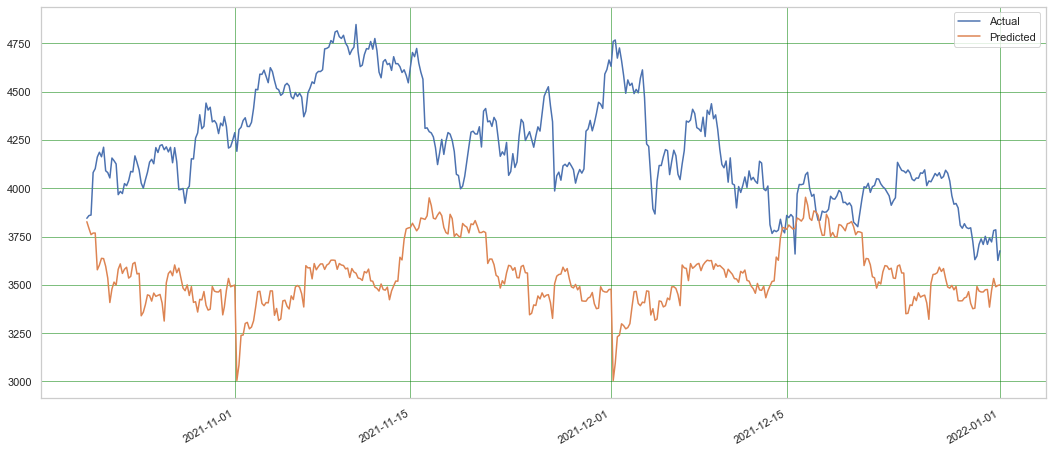

In [101]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df2 = pd.DataFrame({'train': y_train})
ax = df.plot()
df2.plot(ax=ax)
df.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparison of all algorithms Results on MSE score

In [102]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MSE score"] # for  column names 

x.add_row(["SARIMAX Algorithm", round(test_mse1,3)]) # for the results of mse 
x.add_row(["ARIMAX Algorithm", round(test_mse2,3)]) # for the results of mse 
x.add_row(["MLP Algorithm", round(test_mse3,3)]) # for the results of mse 
x.add_row(["Ridge Algorithm", round(test_mse7,3)]) # for the results of mse 
x.add_row(["Random Forest Algorithm", round(test_mse8,3)]) # for the results of mse 
x.add_row(["XGB Algorithm", round(test_mse9,3)]) # for the results of mse 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-------------+
|          Model          |  MSE score  |
+-------------------------+-------------+
|    SARIMAX Algorithm    |  150618.616 |
|     ARIMAX Algorithm    |  184964.855 |
|      MLP Algorithm      | 2465600.192 |
|     Ridge Algorithm     |  593000.347 |
| Random Forest Algorithm |  829311.07  |
|      XGB Algorithm      |  571290.406 |
+-------------------------+-------------+




# Comparison of all algorithms Results on MAE score

In [103]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAE score"] # for  column names 


x.add_row(["SARIMAX Algorithm", round(test_MAE1,3)]) # for the results of MAE 
x.add_row(["ARIMAX Algorithm", round(test_MAE2,3)]) # for the results of MAE 
x.add_row(["MLP Algorithm", round(test_MAE3,3)]) # for the results of MAE 
x.add_row(["Ridge Algorithm", round(test_MAE7,3)]) # for the results of MAE  
x.add_row(["Random Forest Algorithm", round(test_MAE8,3)]) # for the results of MAE 
x.add_row(["XGB Algorithm", round(test_MAE9,3)]) # for the results of MAE 
print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
|    SARIMAX Algorithm    |  312.958  |
|     ARIMAX Algorithm    |  352.655  |
|      MLP Algorithm      |  1435.576 |
|     Ridge Algorithm     |  674.421  |
| Random Forest Algorithm |  871.973  |
|      XGB Algorithm      |  673.882  |
+-------------------------+-----------+




# Comparison of all algorithms Results on RMSE score

In [104]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "RMSE score"] # for  column names 

x.add_row(["SARIMAX Algorithm", round(test_rmse1,3)]) # for the results of rmse 
x.add_row(["ARIMAX Algorithm", round(test_rmse2,3)]) # for the results of rmse 
x.add_row(["MLP Algorithm", round(test_rmse3,3)]) # for the results of rmse 
x.add_row(["Ridge Algorithm", round(test_rmse7,3)]) # for the results of rmse 
x.add_row(["Random Forest Algorithm", round(test_rmse8,3)]) # for the results of rmse 
x.add_row(["XGB Algorithm", round(test_rmse9,3)]) # for the results of rmse 



print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | RMSE score |
+-------------------------+------------+
|    SARIMAX Algorithm    |  388.096   |
|     ARIMAX Algorithm    |  430.075   |
|      MLP Algorithm      |  1570.223  |
|     Ridge Algorithm     |  770.065   |
| Random Forest Algorithm |  910.665   |
|      XGB Algorithm      |  755.838   |
+-------------------------+------------+




# Comparison of all algorithms Results on MAPE score

In [105]:
x = PrettyTable() #calling prettytable for the table 
print('\n') # for new line 
print("Comparison of all algorithms") # for  title 
x.field_names = ["Model", "MAPE score"] # for  column names 

x.add_row(["SARIMAX Algorithm", round(test_mape1,3)]) # for the results of mape 
x.add_row(["ARIMAX Algorithm", round(test_mape2,3)]) # for the results of mape 
x.add_row(["MLP Algorithm", round(test_mape3,3)]) # for the results of mape 
x.add_row(["Ridge Algorithm", round(test_mape7,3)]) # for the results of mape 
x.add_row(["Random Forest Algorithm", round(test_mape8,3)]) # for the results of mape 
x.add_row(["XGB Algorithm", round(test_mape9,3)]) # for the results of mape 


print(x) # printing the table 
print('\n') #new line 



Comparison of all algorithms
+-------------------------+------------+
|          Model          | MAPE score |
+-------------------------+------------+
|    SARIMAX Algorithm    |   0.072    |
|     ARIMAX Algorithm    |    0.08    |
|      MLP Algorithm      |   0.335    |
|     Ridge Algorithm     |   0.155    |
| Random Forest Algorithm |   0.204    |
|      XGB Algorithm      |   0.156    |
+-------------------------+------------+


